Install required libraries

In [1]:
!pip install wandb
!pip install -U scikit-learn

     |████████████████████████████████| 2.1MB 7.1MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 163kB 34.6MB/s 
     |████████████████████████████████| 133kB 29.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8786 sha256=b55f71677283d0c476f8dd591a6968eb660397d4d5b846feea590a9ab2f7ca13
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6489 sha256=ccc075bd340de5edb664098d6eac30382613d93e1941b0a05cbcded8df4d67da
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
Successfully built pathtools subprocess32
     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [3]:
import os
import sys
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
# import wandb #Import this to collab
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import torchvision.utils as vutils
import torch.nn as nn
import torch.optim as optim
#from config import config
import matplotlib.animation as animation
from IPython.display import HTML
from sklearn.metrics import accuracy_score
# import torchgan
# from torchgan.layers import SpectralNorm2d
import pandas as pd

In [ ]:
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only. If you want to enable GPU, please to go Edit > Notebook Settings > Hardware Accelerator and select GPU.")

Load images

In [ ]:
# Import from our Shared Google Drive
# Set directories for training and testing datasets

digits = range(1,11)

# Images are 32 x 32
img_size = 32
image_size = 32

# Create transforms
train_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
test_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# main_dir = "/content/drive/Shareddrives/EECS 504 Shared Drive/Fake Images/"

# Load all 128 images
Create datasets
# generated_images = datasets.ImageFolder(main_dir, transform=train_transform)
# test_img = datasets.ImageFolder(test_dir, transform=test_transform) 

# root_dir = "/content/drive/Shareddrives/EECS 504 Shared Drive/Datasets/SVHN Dataset/"

# train_dir = root_dir + "train/"
# train_img = datasets.ImageFolder(train_dir, transform=train_transform) 

# test_dir = root_dir + "test/"
# test_img = datasets.ImageFolder(test_dir, transform=test_transform) 

# main_dir = "/content/drive/Shareddrives/EECS 504 Shared Drive/Fake Images/"
# generated_images = datasets.ImageFolder(main_dir, transform=train_transform)

SyntaxError: ignored

In [ ]:
print("train_img type   :",type(train_img))
print("train_img length :",len(train_img))
print("train_img classes:",train_img.classes)
print("train_img[0] type:",type(train_img[0]))
print("train_img[0][0] t:",type(train_img[0][0]))
print("train_img[0][1] t:",type(train_img[0][1]))
print("train_img[0][0] s:",train_img[0][0].size())
print("train_img[0][1]  :",train_img[0][1])

n_labels = len(train_img.classes)

print("test_img type   :",type(test_img))
print("test_img length :",len(test_img))
print("test_img classes:",test_img.classes)
print("test_img[0] type:",type(test_img[0]))
print("test_img[0][0] t:",type(test_img[0][0]))
print("test_img[0][1] t:",type(test_img[0][1]))
print("test_img[0][0] s:",test_img[0][0].size())
print("test_img[0][1]  :",test_img[0][1])

print("generated_images type   :",type(generated_images))
print("generated_images length :",len(generated_images))
# print("test_img length :",len(test_img))
print("generated_images classes:",generated_images.classes)
print("generated_images[0] type:",type(generated_images[0]))
print("generated_images[0][0] t:",type(generated_images[0][0]))
print("generated_images[0][1] t:",type(generated_images[0][1]))
print("generated_images[0][0] s:",generated_images[0][0].size())
print("generated_images[0][1]  :",generated_images[0][1])

train_img type   : <class 'torchvision.datasets.folder.ImageFolder'>
train_img length : 42617
train_img classes: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
train_img[0] type: <class 'tuple'>
train_img[0][0] t: <class 'torch.Tensor'>
train_img[0][1] t: <class 'int'>
train_img[0][0] s: torch.Size([3, 32, 32])
train_img[0][1]  : 0
test_img type   : <class 'torchvision.datasets.folder.ImageFolder'>
test_img length : 25982
test_img classes: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
test_img[0] type: <class 'tuple'>
test_img[0][0] t: <class 'torch.Tensor'>
test_img[0][1] t: <class 'int'>
test_img[0][0] s: torch.Size([3, 32, 32])
test_img[0][1]  : 0
generated_images type   : <class 'torchvision.datasets.folder.ImageFolder'>
generated_images length : 23006
generated_images classes: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
generated_images[0] type: <class 'tuple'>
generated_images[0][0] t: <class 'torch.Tensor'>
generated_images[0][1] t: <class 'int'>
generated_ima

# Classification (K Nearest Neighbors)





Be sure to run everything before and including "Loading Data" part

Image processing

In [ ]:
def knn_image_proc(data_img, m = None):
  '''
  Image flattening and normalization for kNN
  Input:
    data_img: images and labels
  Output:
    x_train: processed images (flattened to be vectors and normalized)
    y: labels
  '''
  n_train = len(data_img)

  x_raw = []

  y = []

  for i in range(n_train):
    # x_i = train_img[i][0].reshape(-1)
    x_i = np.array(data_img[i][0].reshape(-1))
    x_raw.append(x_i)
    y.append(data_img[i][1])

    if i%1000 == 0:
      print('Has processed ' + str(i) + ' out of ' + str(n_train) + ' images')

  # Normalize to zero mean so covariance is just matrix multiplication
  if m is None: 
    m = np.mean(x_raw, axis=0, keepdims=True)
  x = x_raw - m 

  return x, y,  m

Reduction

In [ ]:
def compute_basis(data, n=300):
  """ 
  Computing basis for image reduction
  Inputs:
      data: multi-dimensional array of size number of images * number of pixels. Each row is a flatten image.
      n: number of modes to be kept
  Output:
      eigenvectors: basis
  """
  
  eigenvectors = None

  sig = np.matmul(np.transpose(data),data)
  _, eigenvectors = np.linalg.eig(sig)
  eigenvectors = eigenvectors[:, range(n)]

  return eigenvectors

kNN

In [ ]:
# # Self defined kNN function
# def knn_predict(eig_train_x, eig_test_x, y_train, y_test, k=1):

#   """Implement the KNN algorithm. The output should be a vector containing your predictions"""

#   predictions = np.zeros_like(y_test)
    
#   N, D = eig_train_x.shape
#   for i in range(len(y_test)):
#     d = np.ones((N,))
#     for j in range(N):
#       dx = eig_train_x[j,:] - eig_test_x[i,:]
#       d[j] = np.linalg.norm(dx)

#     x_in = np.argsort(d)
#     neb_in = x_in[:k]
#     neb_y = y_train[neb_in]

#     counts = np.bincount(neb_y)
#     predictions[i] = np.argmax(counts)

#   return predictions

# kNN over the original data set (real image)

In [ ]:
# Data will be saved to here
save_dir = '/content/drive/Shareddrives/EECS 504 Shared Drive/Dictionary Saved/'

k = 10 # k nearest neighbors

if_POD = True # Do we do POD?

In [ ]:

# Image flattening and normalization for the original training data set
# x_train_real, y_train_real, mean_train_real = knn_image_proc(train_img)

# Image reduction
if if_POD:
  eigenvectors_real = compute_basis(x_train_real, n=300)
else:
  _, n_dim  = x_train_real.shape
  eigenvectors_real = np.identity(n_dim)

x_train_reduced_real = np.matmul(x_train_real, eigenvectors_real)

# kNN training
neigh_real = KNeighborsClassifier(n_neighbors = k)
neigh_real.fit(x_train_reduced_real, y_train_real)

# save_dict_real = {"x_train_real":x_train_real, 
#              "y_train_real":y_train_real, 
#              "mean_train_real":mean_train_real,
#              "neigh_real":neigh_real}

# np.save(save_dir + 'save_dict_real.npy', save_dict_real)

Has processed 0 out of 42617 images
Has processed 1000 out of 42617 images
Has processed 2000 out of 42617 images
Has processed 3000 out of 42617 images
Has processed 4000 out of 42617 images
Has processed 5000 out of 42617 images
Has processed 6000 out of 42617 images
Has processed 7000 out of 42617 images
Has processed 8000 out of 42617 images
Has processed 9000 out of 42617 images
Has processed 10000 out of 42617 images
Has processed 11000 out of 42617 images
Has processed 12000 out of 42617 images
Has processed 13000 out of 42617 images
Has processed 14000 out of 42617 images
Has processed 15000 out of 42617 images
Has processed 16000 out of 42617 images
Has processed 17000 out of 42617 images
Has processed 18000 out of 42617 images
Has processed 19000 out of 42617 images
Has processed 20000 out of 42617 images
Has processed 21000 out of 42617 images
Has processed 22000 out of 42617 images
Has processed 23000 out of 42617 images
Has processed 24000 out of 42617 images
Has processed

KNeighborsClassifier()

In [ ]:
# kNN training
neigh_real = KNeighborsClassifier(n_neighbors = k)
neigh_real.fit(x_train_reduced_real, y_train_real)

NameError: ignored

In [ ]:
# Image flattening and normalization for the original test data set
# x_test_real, y_test_, _ = knn_image_proc(test_img, mean_train_real)
y_test = np.array(y_test_)

x_test_real_reduced = np.matmul(x_test_real, eigenvectors_real)

# kNN prediction
y_test_real_kNN = neigh_real.predict(x_test_real_reduced)

## Evalution
accuracy_real = np.sum(y_test_real_kNN == y_test)/y_test_real_kNN.size
print('The accuracy of kNN with real images is: ', accuracy_real*100, "%")

accuracy_real_digit = zeros(1, n_labels)
print('Accuracy for individual digits:')
for i_digit in range(1,n_labels+1):
  y_test_digit = y_test[y_test==i_digit]
  accuracy_real_digit[i_digit-1] = np.sum(y_test_kNN_real[y_test==i_digit] == y_test_digit)/y_test_digit.size
  print('The accuracy of kNN with real images ' + 'for digit ', i_digit, 'is: ', accuracy_real_digit[i_digit-1]*100, "%")

df = pd.DataFrame({'lab':str(range(1,n_labels+1)), 'val':accuracy_real_digit*100})
ax = df.plot.bar(x='Digits', y='Accuracy (%)', rot=0)

save_dict_real = {"x_train_real":x_train_real, 
             "y_train_real":y_train_real,
             "x_test_real":x_test_real,
             "y_test":y_test,
             "mean_train_real":mean_train_real,
             "neigh_real":neigh_real,
             "accuracy_real":accuracy_real,
             "accuracy_real_digit":accuracy_real_digit}

np.save(save_dir + 'save_dict_real.npy', save_dict_real)

# kNN over generated data set (generated images)

In [ ]:
# Image flattening and normalization for the original training data set
x_train_fake, y_train_fake, mean_train_fake = knn_image_proc(generated_images)

# Image reduction
if if_POD:
  eigenvectors_fake = compute_basis(x_train_fake, n=300)
else:
  _, n_dim  = x_train_fake.shape
  eigenvectors_fake = np.identity(n_dim)

x_train_fake_reduced = np.matmul(x_train_fake, eigenvectors_fake)

# kNN training
neigh_fake = KNeighborsClassifier(n_neighbors = k)
neigh_fake.fit(x_train_fake_reduced, y_train_fake)

save_dict_fake = {"x_train_fake":x_train_fake, 
             "y_train_fake":y_train_fake,
             "mean_train_fake":mean_train_fake,
             "neigh_fake":neigh_fake
             }

np.save(save_dir + 'save_dict_fake.npy', save_dict_fake)

Has processed 0 out of 23006 images
Has processed 1000 out of 23006 images
Has processed 2000 out of 23006 images
Has processed 3000 out of 23006 images
Has processed 4000 out of 23006 images
Has processed 5000 out of 23006 images
Has processed 6000 out of 23006 images
Has processed 7000 out of 23006 images
Has processed 8000 out of 23006 images
Has processed 9000 out of 23006 images
Has processed 10000 out of 23006 images
Has processed 11000 out of 23006 images
Has processed 12000 out of 23006 images
Has processed 13000 out of 23006 images
Has processed 14000 out of 23006 images
Has processed 15000 out of 23006 images
Has processed 16000 out of 23006 images
Has processed 17000 out of 23006 images
Has processed 18000 out of 23006 images
Has processed 19000 out of 23006 images
Has processed 20000 out of 23006 images
Has processed 21000 out of 23006 images
Has processed 22000 out of 23006 images
Has processed 23000 out of 23006 images


In [ ]:
# Image flattening and normalization for the original test data set
x_test_fake, _, _ = knn_image_proc(test_img, mean_train_fake)

x_test_fake_reduced = np.matmul(x_test_fake, eigenvectors_fake)

# kNN prediction
y_test_fake_kNN = neigh_fake.predict(x_test_fake_reduced)

## Evalution
accuracy_fake = np.sum(y_test_fake_kNN == y_test)/y_test_fake_kNN.size
print('The accuracy of kNN with the original and generated images is: ', accuracy_fake*100, "%")

accuracy_fake_digit = zeros(1, n_labels)
print('Accuracy for individual digits:')
for i_digit in range(1,n_labels+1):
  y_test_digit = y_test[y_test==i_digit]
  accuracy_fake_digit[i_digit-1] = np.sum(y_test_fake_kNN[y_test==i_digit] == y_test_digit)/y_test_digit.size
  print('The accuracy of kNN with the generated images ' + 'for digit ', i_digit, 'is: ', accuracy_fake_digit[i_digit-1]*100, "%")

df = pd.DataFrame({'lab':str(range(1,n_labels+1)), 'val':accuracy_fake_digit})
ax = df.plot.bar(x='Digits', y='Accuracy (%)', rot=0)

save_dict_fake = {"x_train_fake":x_train_fake, 
             "y_train_fake":y_train_fake,
             "x_test_fake":x_test_fake,
             "y_test":y_test,
             "mean_train_fake":mean_train_fake,
             "neigh_fake":neigh_fake,
             "accuracy_fake":accuracy_fake,
             "accuracy_fake_digit":accuracy_fake_digit,
             }

np.save(save_dir + 'save_dict_fake.npy', save_dict_fake)

Has processed 0 out of 25982 images
Has processed 1000 out of 25982 images
Has processed 2000 out of 25982 images
Has processed 3000 out of 25982 images
Has processed 4000 out of 25982 images
Has processed 5000 out of 25982 images
Has processed 6000 out of 25982 images
Has processed 7000 out of 25982 images
Has processed 8000 out of 25982 images
Has processed 9000 out of 25982 images
Has processed 10000 out of 25982 images
Has processed 11000 out of 25982 images
Has processed 12000 out of 25982 images
Has processed 13000 out of 25982 images
Has processed 14000 out of 25982 images
Has processed 15000 out of 25982 images
Has processed 16000 out of 25982 images
Has processed 17000 out of 25982 images
Has processed 18000 out of 25982 images
Has processed 19000 out of 25982 images
Has processed 20000 out of 25982 images
Has processed 21000 out of 25982 images
Has processed 22000 out of 25982 images
Has processed 23000 out of 25982 images
Has processed 24000 out of 25982 images
Has processed

NameError: ignored

# kNN over combined data set (real and generated images)

In [ ]:
# img_sets = [];
# img_sets.append(train_img)
# img_sets.append(generated_images)
# image_datasets = torch.utils.data.ConcatDataset(img_sets)

In [ ]:
save_dict_comb = {"x_train_comb":x_train_comb,
                  "y_train_comb":y_train_comb,
                  "mean_train_comb":mean_train_comb,
                  "neigh_comb":neigh_comb,
                  "x_train_comb_reduced": x_train_comb_reduced}

np.save(save_dir + 'save_dict_comb.npy', save_dict_comb)

In [5]:
# Image flattening and normalization for the original training data set
# x_train_comb, y_train_comb, mean_train_comb = knn_image_proc(image_datasets)
k = 10

load_dictionary = np.load('/content/drive/Shareddrives/EECS 504 Shared Drive/Dictionary Saved/save_dict_comb.npy',allow_pickle='TRUE').item()
x_train_comb = load_dictionary['x_train_comb']
y_train_comb = load_dictionary['y_train_comb']
x_train_comb_reduced = load_dictionary['x_train_comb_reduced']
# Image reduction
# if if_POD:
#   eigenvectors_comb = compute_basis(x_train_comb, n=300)
# else:
#   _, n_dim  = x_train_comb.shape
#   eigenvectors_comb = np.identity(n_dim)

# x_train_comb_reduced = np.matmul(x_train_comb, eigenvectors_comb)

# kNN training
neigh_comb = KNeighborsClassifier(n_neighbors = k)
neigh_comb.fit(x_train_comb_reduced, y_train_comb)

# save_dict_comb = {"x_train_comb":x_train_comb,
#                   "y_train_comb":y_train_comb,
#                   "mean_train_comb":mean_train_comb,
#                   "neigh_comb":neigh_comb}

# np.save(save_dir + 'save_dict_comb.npy', save_dict_comb)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# kNN training
neigh_comb = KNeighborsClassifier(n_neighbors = k)
neigh_comb.fit(x_train_comb_reduced, y_train_comb)

KNeighborsClassifier(n_neighbors=10)

The accuracy of kNN with the original and generated images is:  55.54614733276884 %
Accuracy for individual digits:
The accuracy of kNN with the original and generated images for digit  1 is:  67.43119266055045 %
The accuracy of kNN with the original and generated images for digit  2 is:  54.08532176428055 %
The accuracy of kNN with the original and generated images for digit  3 is:  38.6884108258154 %
The accuracy of kNN with the original and generated images for digit  4 is:  70.0753071739992 %
The accuracy of kNN with the original and generated images for digit  5 is:  37.79362416107382 %
The accuracy of kNN with the original and generated images for digit  6 is:  43.14618108244815 %
The accuracy of kNN with the original and generated images for digit  7 is:  61.36701337295691 %
The accuracy of kNN with the original and generated images for digit  8 is:  35.722891566265055 %
The accuracy of kNN with the original and generated images for digit  9 is:  44.63949843260188 %
The accuracy

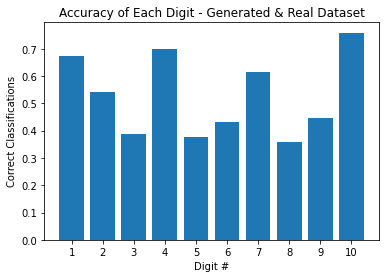

In [10]:
# Image flattening and normalization for the original test data set
# x_test_comb, y_test, _ = knn_image_proc(test_img, mean_train_comb)
read_dictionary = np.load('/content/drive/Shareddrives/EECS 504 Shared Drive/Dictionary Saved/save_dict_comb.npy',allow_pickle='TRUE').item()
x_test_comb = read_dictionary['x_test_comb']
y_test_comb = read_dictionary['y_test']
x_test_comb_reduced = read_dictionary['x_test_comb_reduced']

# x_test_comb_reduced = np.matmul(x_test_comb, eigenvectors_comb)

# kNN prediction
y_test_comb_kNN = neigh_comb.predict(x_test_comb_reduced)

## Evalution
accuracy_comb = np.sum(y_test_comb_kNN == y_test_comb)/y_test_comb_kNN.size
print('The accuracy of kNN with the original and generated images is: ', accuracy_comb*100, "%")

n_labels = 10
y_test = np.array(y_test_comb)
accuracy_comb_digit = np.zeros((n_labels,))
print('Accuracy for individual digits:')
for i_digit in range(1,n_labels+1):
  evalu_digit = i_digit
  if i_digit == 10:
    evalu_digit = 0
  y_test_digit = y_test[y_test==evalu_digit]
  accuracy_comb_digit[i_digit-1] = np.sum(y_test_comb_kNN[y_test==evalu_digit] == y_test_digit)/y_test_digit.size
  print('The accuracy of kNN with the original and generated images ' + 'for digit ', evalu_digit, 'is: ', accuracy_comb_digit[i_digit-1]*100, "%")

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
# x = np.zeros((n_labels, 1))
accuracyList = accuracy_comb_digit.tolist()
print(type(accuracyList))
plt.bar(x, accuracyList)
plt.title('Accuracy of Each Digit - Generated & Real Dataset')
plt.xlabel('Digit #')
plt.ylabel('Correct Classifications')
plt.show()


# save_dict_comb = {"x_train_comb":x_train_comb,
#              "y_train_comb":y_train_comb,
#              "x_test_comb":x_test_comb,
#              "y_test":y_test,
#              "mean_train_comb":mean_train_comb,
#              "neigh_comb":neigh_comb,
#              "accuracy_comb":accuracy_comb,
#              "accuracy_comb_digit":accuracy_comb_digit}

# np.save(save_dir + 'save_dict_comb.npy', save_dict_comb)

In [8]:
accuracy_comb = np.sum(y_test_comb_kNN == y_test_comb)/y_test_comb_kNN.size
print('The accuracy of kNN with the original and generated images is: ', accuracy_comb*100, "%")

n_labels = 10
accuracy_comb_digit = np.zeros((n_labels,))
print('Accuracy for individual digits:')
for i_digit in range(1,n_labels+1):
  evalu_digit = i_digit
  if i_digit == 10:
    evalu_digit = 0
  y_test_digit = y_test_comb[y_test_comb==evalu_digit]
  accuracy_comb_digit[i_digit-1] = np.sum(y_test_comb_kNN[y_test_comb==evalu_digit] == y_test_digit)/y_test_digit.size
  print('The accuracy of kNN with the original and generated images ' + 'for digit ', evalu_digit, 'is: ', accuracy_comb_digit[i_digit-1]*100, "%")

x = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
# x = np.zeros((n_labels, 1))
accuracyList = accuracy_comb_digit.tolist()
print(type(accuracyList))
plt.bar(x, accuracyList)
plt.title('Accuracy of Each Digit - Generated & Real Dataset')
plt.xlabel('Digit #')
plt.ylabel('Correct Classifications')
plt.show()

The accuracy of kNN with the original and generated images is:  55.54614733276884 %
Accuracy for individual digits:


AttributeError: ignored

In [ ]:
y_test_comb_kNN = neigh_comb.predict(x_test_comb_reduced)
## Evalution
accuracy_comb = np.sum(y_test_comb_kNN == y_test_comb)/y_test_comb_kNN.size
print('The accuracy of kNN with the original and generated images is: ', accuracy_comb*100, "%")

The accuracy of kNN with the original and generated images is:  55.54614733276884 %


In [ ]:
save_dict_comb = {"x_train_comb":x_train_comb,
             "y_train_comb":y_train_comb,
             "x_train_comb_reduced": x_train_comb_reduced,
             "x_test_comb":x_test_comb,
             "y_test":y_test,
             "x_test_comb_reduced": x_test_comb_reduced,
             "mean_train_comb":mean_train_comb,
             "neigh_comb":neigh_comb,
             "accuracy_comb":accuracy_comb,
              }

np.save(save_dir + 'save_dict_comb.npy', save_dict_comb)

In [ ]:
accuracy_comb_digit = np.zeros((n_labels,))
print('Accuracy for individual digits:')
for i_digit in range(1,n_labels+1):
  evalu_digit = i_digit
  if i_digit == 10:
    evalu_digit = 0
  y_test_digit = y_test[y_test==evalu_digit]
  accuracy_comb_digit[i_digit-1] = np.sum(y_test_comb_kNN[y_test==evalu_digit] == y_test_digit)/len(y_test_digit)
  print('The accuracy of kNN with the original and generated images ' + 'for digit ', evalu_digit, 'is: ', accuracy_comb_digit[i_digit-1]*100, "%")

save_dict_comb = {"x_train_comb":x_train_comb,
             "y_train_comb":y_train_comb,
             "x_test_comb":x_test_comb,
             "y_test":y_test,
             "mean_train_comb":mean_train_comb,
             "neigh_comb":neigh_comb,
             "accuracy_comb":accuracy_comb,
             "accuracy_comb_digit":accuracy_comb_digit}

np.save(save_dir + 'save_dict_comb.npy', save_dict_comb)

Accuracy for individual digits:


TypeError: ignored

# Save results (processed data, kNN clasifier, and accuracy results)

In [ ]:
save_dict = {"x_train_real":x_train_real, 
             "y_train_real":y_train_real,
             "x_test_real":x_test_real,
             "y_test":y_test,
             "mean_train_real":mean_train_real,
             "neigh_real":neigh_real,
             "accuracy_real":accuracy_real,
             "accuracy_real_digit":accuracy_real_digit,
             "x_train_fake":x_train_fake, 
             "y_train_fake":y_train_fake,
             "x_test_fake":x_test_fake,
             "mean_train_fake":mean_train_fake,
             "neigh_fake":neigh_fake,
             "accuracy_fake":accuracy_fake,
             "accuracy_fake_digit":accuracy_fake_digit,
             "x_train_comb":x_train_comb,
             "y_train_comb":y_train_comb,
             "x_test_comb":x_test_comb,
             "mean_train_comb":mean_train_comb,
             "neigh_comb":neigh_comb,
             "accuracy_comb":accuracy_comb,
             "accuracy_comb_digit":accuracy_comb_digit}

np.save(save_dir + 'save_dict.npy', save_dict)

# Class visualizations
Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of machine learning research 9.Nov (2008): 2579-2605.
http://www.cs.toronto.edu/~hinton/absps/tsnefinal.pdf

https://github.com/mxl1990/tsne-pytorch/blob/master/tsne_torch.py

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot
import torch
from sklearn.cluster import KMeans

class tsne_visual(object):
  def __init__(self, X, num_dims=2, initial_dims=50, perplexity=30.0):
    self.X = X # Input data, N x D array
    self.num_dims = num_dims # Number of dimensions after reduction, scalar
    self.initial_dims = initial_dims # Number of dimensions before reduction, scalar
    self.perplexity = perplexity # Perplexity for tSNE parameter search, scalar

  def Hbeta_torch(self, D, beta=1.0):
    P = torch.exp(-D.clone() * beta)

    sumP = torch.sum(P)

    H = torch.log(sumP) + beta * torch.sum(D * P) / sumP
    P = P / sumP

    return H, P

  def x2p_torch(self, tol=1e-5):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """
    X = self.X # Input data, N x D array
    perplexity = self.perplexity # Perplexity for tSNE parameter search, scalar

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape

    sum_X = torch.sum(X*X, 1)
    D = torch.add(torch.add(-2 * torch.mm(X, X.t()), sum_X).t(), sum_X)

    P = torch.zeros(n, n)
    beta = torch.ones(n, 1)
    logU = torch.log(torch.tensor([perplexity]))
    n_list = [i for i in range(n)]

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        # there may be something wrong with this setting None
        betamin = None
        betamax = None
        Di = D[i, n_list[0:i]+n_list[i+1:n]]

        (H, thisP) = self.Hbeta_torch(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while torch.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].clone()
                if betamax is None:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].clone()
                if betamin is None:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = self.Hbeta_torch(Di, beta[i])

            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, n_list[0:i]+n_list[i+1:n]] = thisP

    # Return final P-matrix
    return P

  def pca_torch(self):

    X = self.X
    num_dims = self.initial_dims

    print("Preprocessing the data using PCA...")
    
    (n, d) = X.shape
    X = X - torch.mean(X, 0)

    (l, M) = torch.eig(torch.mm(X.t(), X), True)
    # split M real
    for i in range(d):
        if l[i, 1] != 0:
            M[:, i+1] = M[:, i]
            i += 1

    Y = torch.mm(X, M[:, 0:num_dims])
    return Y

  def tsne(self):
    """
        Runs t-SNE on the dataset in the N x D array X to reduce its
        dimensionality to num_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, num_dims, perplexity), where X is an NxD NumPy array.
    """
    X = self.X # Input data, N x D array
    num_dims = self.num_dims # Number of dimensions after reduction, scalar

    # Check inputs
    if isinstance(num_dims, float):
        print("Error: array X should not have type float.")
        return -1
    if round(num_dims) != num_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = self.pca_torch()
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = torch.randn(n, num_dims)
    dY = torch.zeros(n, num_dims)
    iY = torch.zeros(n, num_dims)
    gains = torch.ones(n, num_dims)

    # Compute P-values
    P = self.x2p_torch(tol=1e-5)
    P = P + P.t()
    P = P / torch.sum(P)
    P = P * 4.    # early exaggeration
    print("get P shape", P.shape)
    P = torch.max(P, torch.tensor([1e-21]))

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = torch.sum(Y*Y, 1)
        num = -2. * torch.mm(Y, Y.t())
        num = 1. / (1. + torch.add(torch.add(num, sum_Y).t(), sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / torch.sum(num)
        Q = torch.max(Q, torch.tensor([1e-12]))

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = torch.sum((PQ[:, i] * num[:, i]).repeat(num_dims, 1).t() * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum

        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)).double() + (gains * 0.8) * ((dY > 0.) == (iY > 0.)).double()
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - torch.mean(Y, 0)

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = torch.sum(P * torch.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.
        
        self.Y = Y # Data after dimension reduction
    # Return solution
    return Y

In [ ]:
# Post process Pareto set X
X = # Flattened image data 
labels =  # digits

digit_classes = tsne_visual(X, num_dims=2, initial_dims=50, perplexity=30.0)
Y = digit_classes.tsne() # Dimensionality reduction

font_size = 18
pyplot.scatter(Y[:, 0], Y[:, 1], font_size, labels)
pyplot.xlabel('Space ')
# pyplot.ylabel('Latent policy parameter 2')
pyplot.rc('font', size=font_size)          # controls default text sizes
pyplot.rc('axes', titlesize=font_size)     # fontsize of the axes title
pyplot.rc('axes', labelsize=font_size)    # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=font_size)
pyplot.rc('ytick', labelsize=font_size)
pyplot.show()

Visualization